Entropia da classe: 0.3126
-----------------------------------------------------------------------------------------------
Atributo                          Entropia Padrão   Entropia Condicional    Ganho de Informação
-----------------------------------------------------------------------------------------------
V0001                                      3.6711                 0.3107                 0.0019
V0026                                      0.8293                 0.3116                 0.0010
V0031                                      1.4113                 0.3121                 0.0005
B001                                       1.1951                 0.3125                 0.0001
C006                                       0.9956                 0.3120                 0.0005
C008                                       4.9307                 0.3041                 0.0085
C009                                       1.4480                 0.3124                 0.0002
C011         

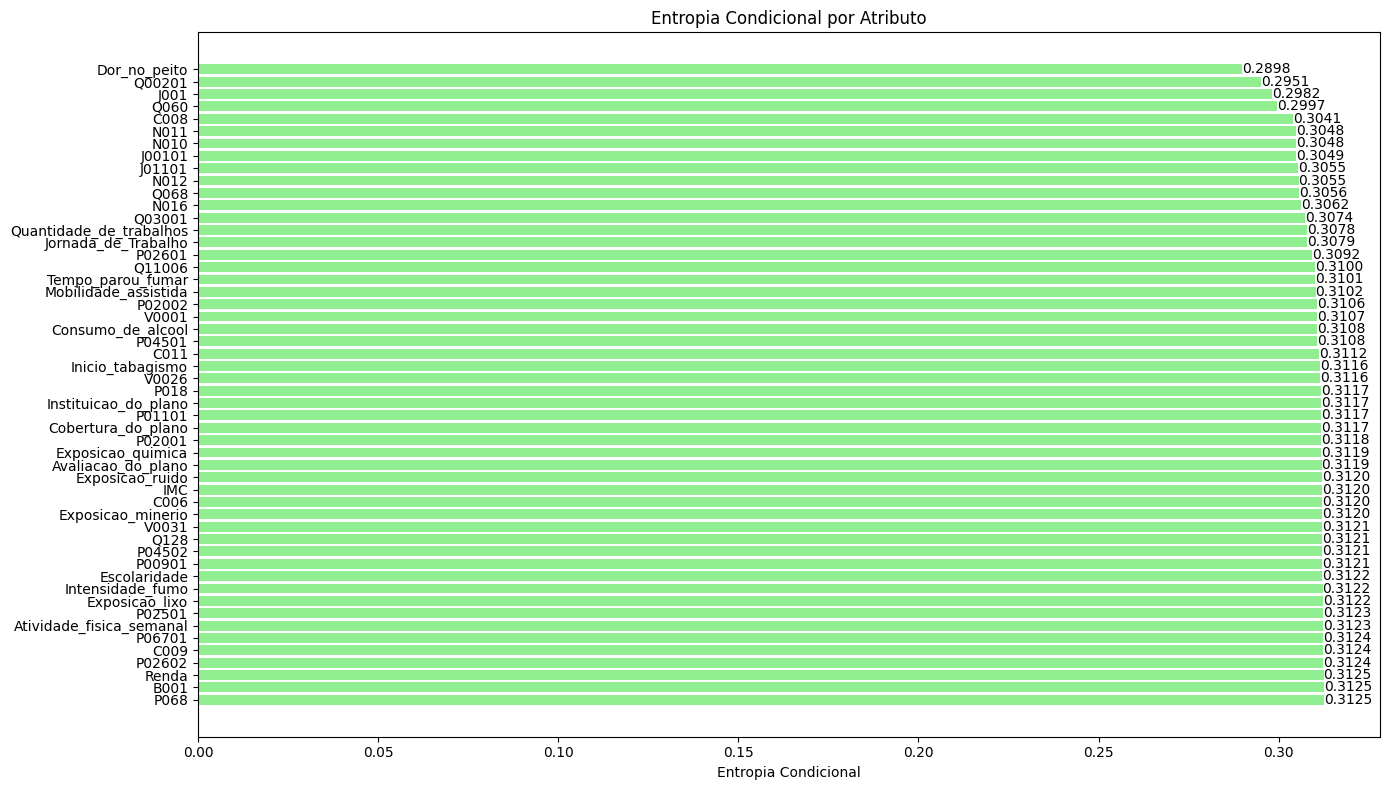


Atributos ordenados por ganho de informação:
---------------------------------------------------
Atributo                        Ganho de Informação
---------------------------------------------------
Dor_no_peito                                 0.0228
Q00201                                       0.0175
J001                                         0.0143
Q060                                         0.0129
C008                                         0.0085
N011                                         0.0078
N010                                         0.0077
J00101                                       0.0077
J01101                                       0.0071
N012                                         0.0071
Q068                                         0.0069
N016                                         0.0064
Q03001                                       0.0052
Quantidade_de_trabalhos                      0.0047
Jornada_de_Trabalho                          0.0046
P02601            

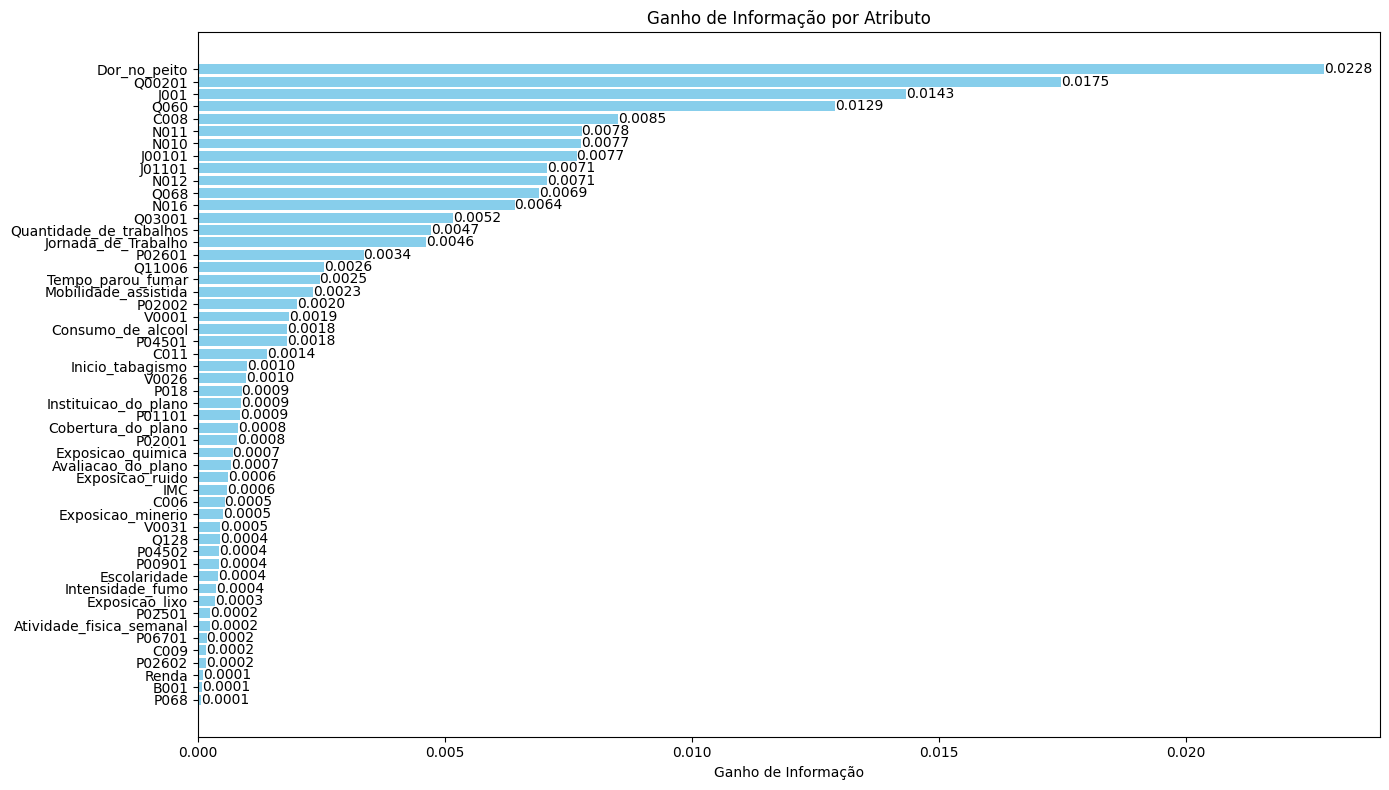

In [5]:
import pandas as pd
from scipy.stats import entropy
import matplotlib.pyplot as plt

base = pd.read_csv("../Bases/Criados/5.1_base_reduzida.csv")
classe = "Q06306"

def entropia_padrao(column):
    prob = column.value_counts(normalize=True)
    return entropy(prob, base=2)

def entropia_condicional(atributo, classe):
    df = pd.concat([atributo, classe], axis=1)
    valores = atributo.unique()
    total = len(atributo)
    entropia_cond = 0.0
    for valor in valores:
        subset = df[df[atributo.name] == valor][classe.name]
        proporcao = len(subset) / total
        entropia_subset = entropia_padrao(subset)
        entropia_cond += proporcao * entropia_subset
    return entropia_cond

entropia_classe = entropia_padrao(base[classe])
print(f"Entropia da classe: {round(entropia_classe, 4)}")
print("-" * 95)

ganhos = {}
entropias_cond = {}

print(f"{'Atributo':<30} {'Entropia Padrão':>18} {'Entropia Condicional':>22} {'Ganho de Informação':>22}")
print("-" * 95)

for atributo in base.columns:
    if atributo == classe:
        continue
    entropia_atr = entropia_padrao(base[atributo])
    entropia_cond = entropia_condicional(base[atributo], base[classe])
    ganho = entropia_classe - entropia_cond
    ganhos[atributo] = ganho
    entropias_cond[atributo] = entropia_cond
    print(f"{atributo:<30} {entropia_atr:>18.4f} {entropia_cond:>22.4f} {ganho:>22.4f}")

# Ordena as entropias condicionais
entropias_cond_ordenadas = sorted(entropias_cond.items(), key=lambda x: x[1])

# --- Gráfico de Entropia Condicional ---
plt.figure(figsize=(14, 8))
atributos_cond = [item[0] for item in entropias_cond_ordenadas]
valores_cond = [item[1] for item in entropias_cond_ordenadas]

bars = plt.barh(atributos_cond, valores_cond, color='lightgreen')
plt.xlabel('Entropia Condicional')
plt.title('Entropia Condicional por Atributo')

# Adicionando os valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{width:.4f}', va='center', ha='left')

plt.gca().invert_yaxis()  # Coloca o menor no topo
plt.tight_layout()
plt.show()

# Ordena os ganhos
ganhos_ordenados = sorted(ganhos.items(), key=lambda x: x[1], reverse=True)

print("\nAtributos ordenados por ganho de informação:")
print("-" * 51)
print(f"{'Atributo':<30} {'Ganho de Informação':>20}")
print("-" * 51)

for atributo, ganho in ganhos_ordenados:
    print(f"{atributo:<30} {ganho:>20.4f}")

# --- Gráfico de Ganho de Informação ---
plt.figure(figsize=(14, 8))
atributos_ganho = [item[0] for item in ganhos_ordenados]
valores_ganho = [item[1] for item in ganhos_ordenados]

bars = plt.barh(atributos_ganho, valores_ganho, color='skyblue')
plt.xlabel('Ganho de Informação')
plt.title('Ganho de Informação por Atributo')

# Adicionando os valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{width:.4f}', va='center', ha='left')

plt.gca().invert_yaxis()  # Coloca o maior no topo
plt.tight_layout()
plt.show()

In [6]:
# --- Filtrar atributos com entropia condicional acima de um limiar ---
limiar = 0.312  # <-- Defina aqui o valor desejado para o limiar

atributos_acima_limiar = {atributo: entropia for atributo, entropia in entropias_cond.items() if entropia > limiar}

print(f"\nAtributos com entropia condicional acima de {limiar}:")
print("-" * 51)
print(f"{'Atributo':<30} {'Entropia Condicional':>20}")
print("-" * 51)

for atributo, entropia in sorted(atributos_acima_limiar.items(), key=lambda x: x[1], reverse=True):
    print(f"{atributo:<30} {entropia:>20.4f}")


Atributos com entropia condicional acima de 0.312:
---------------------------------------------------
Atributo                       Entropia Condicional
---------------------------------------------------
P068                                         0.3125
B001                                         0.3125
Renda                                        0.3125
P02602                                       0.3124
C009                                         0.3124
P06701                                       0.3124
Atividade_fisica_semanal                     0.3123
P02501                                       0.3123
Exposicao_lixo                               0.3122
Intensidade_fumo                             0.3122
Escolaridade                                 0.3122
P00901                                       0.3121
P04502                                       0.3121
Q128                                         0.3121
V0031                                        0.3121
Exposicao_mi